In [1]:
%load_ext autoreload
%autoreload 2
from rdkit import Chem
from rdkit.Chem import Draw
from fragmenstein import Victor, Igor
import sys
import pandas as pd
from itertools import chain
import ast
import subprocess
from rdkit.Chem.Draw import DrawingOptions
from rdkit.Chem import rdFMCS
from IPython.display import display
import xml.etree.ElementTree as ET
import os
import subprocess
from chemUtils.visualization import molPlot
from reportlab.pdfgen import canvas
from PIL import Image
import io
import img2pdf

# FIND ALL ROUTES WITH A MAX STEP OF 3 WITH NO CAR RESTRICTIONS AND THESE CATALOGS ["mcule_ultimate", "generic", "molport", "mcule", "enamine_bb", "enamine_made", "enamine_real"]

In [3]:
# Run through retrosynthesis Manifold on terminal
# python /Users/kate_fieseler/PycharmProjects/postera/postera_retrosynthesis.py /Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/base_data/D68EV3CPROA_enumeration_oct10.csv 1

In [8]:
# Organize routes into 1, 2, and 3 step elaborations.
# input: cache_path, csv of smiles path
# output: csv of specified compound, with single step reactions and reactants
sqlite_path = "/Users/kate_fieseler/PycharmProjects/postera/cache/D68EV3CPROA_OCT10_all_rxns.sqlite"
results_dir = "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data"
csv_smiles = "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/base_data/D68EV3CPROA_enumeration_oct10.csv" # must contain header with 'smiles'
command = [
    "python",
    "/Users/kate_fieseler/PycharmProjects/postera/process_cache_outputv2.py",
    "-t",
    sqlite_path,
    "-r",
    results_dir,
    "-s",
    csv_smiles,
    "-n",
    "3",
    "-x"
]
subprocess.run(command)

SMILES to search: ['Cc1cc2c(cc1NC(=O)NCCc1nnc3ccccn13)OCO2', 'Cc1ccc(CCS(=O)(=O)NCc2nnc3ccccn23)cc1', 'OC[C@H](c1ccc2c(c1)OCO2)N(CCc1nnc2ccccn12)C[C@@H](O)c1ccc2c(c1)OCO2', 'O=C(CSc1nnc2ccccn12)Nc1ccc2c(c1)OCO2', 'CCc1nnc2ccc(S(=O)(=O)N(CC)c3ccc4c(c3)OCO4)cn12', 'O=C(NCc1nnc2ccccn12)c1ccc2c(c1)OCO2', 'O=S(=O)(CCC1CC1)NCc1nnc2ccccn12', 'OC[C@@H](c1ccc2c(c1)OCO2)N(CCc1nnc2ccccn12)C[C@H](O)c1ccc2c(c1)OCO2', 'C[C@@H](c1ccc(F)cc1)S(=O)(=O)NCc1nnc2ccccn12', 'O=S(=O)(CCc1cccc(F)c1)NCc1nnc2ccccn12', 'Cc1nnc2c(NCc3ccc4c(c3)OCO4)nccn12', 'O=C(CSc1nnc2ccccn12)Nc1ccc2c(c1)OCO2', 'O=C(NCc1ccc2c(c1)OCO2)c1ccc2nncn2c1', 'O=C(C=Cc1ccc2c(c1)OCO2)NCCc1nnc2ccccn12', 'CSCC[C@H](NC(=O)c1ccc2c(c1)OCO2)c1nnc2ccccn12', 'CC(C)[C@H](NC(=O)c1ccc2c(c1)OCO2)c1nnc2ccccn12', 'Cc1ccn2cnnc2c1NC(=O)c1ccc2c(c1)OCO2', 'O=C(Nc1ccc2c(c1)OCO2)c1ccc2nnc(S)n2c1', 'O=C(CCc1ccc2c(c1)OCO2)N1CCC[C@@H]1c1nnc2ccccn12', 'C[C@@H](Sc1nnc2ccc(C(F)(F)F)cn12)C(=O)Nc1ccc2c(c1)OCO2', 'O=C(NCc1ccc2c(c1)OCO2)NCc1nnc2cc(C(F)(F)F)ccn12', 'O=C(

CompletedProcess(args=['python', '/Users/kate_fieseler/PycharmProjects/postera/process_cache_outputv2.py', '-t', '/Users/kate_fieseler/PycharmProjects/postera/cache/D68EV3CPROA_OCT10_all_rxns.sqlite', '-r', '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data', '-s', '/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/base_data/D68EV3CPROA_enumeration_oct10.csv', '-n', '3', '-x'], returncode=0)

In [11]:
# Filter down dataframe to keep first route for each compound
os.chdir("/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data")
df1 = pd.read_csv("D68EV3CPROA_enumeration_oct10_routes_1_step.csv")
df1.drop_duplicates(subset=['smiles'], inplace=True, keep='first', ignore_index=True)
df1.to_csv("D68EV3CPROA_enumeration_oct10_first_route_1_step.csv", index=False)
len(df1)

597

In [13]:
df2 = pd.read_csv("D68EV3CPROA_enumeration_oct10_routes_2_steps.csv")
df2.drop_duplicates(subset=['smiles'], inplace=True, keep='first', ignore_index=True)
df2.to_csv("D68EV3CPROA_enumeration_oct10_first_route_2_step.csv", index=False)
len(df2)

608

In [14]:
df3 = pd.read_csv("D68EV3CPROA_enumeration_oct10_routes_3_steps.csv")
df3.drop_duplicates(subset=['smiles'], inplace=True, keep='first', ignore_index=True)
df3.to_csv("D68EV3CPROA_enumeration_oct10_first_route_3_step.csv", index=False)
len(df3)

481

In [18]:
# Find number of compounds that are only found in 1 dataframe
df1 = pd.read_csv("D68EV3CPROA_enumeration_oct10_first_route_1_step.csv")
df2 = pd.read_csv("D68EV3CPROA_enumeration_oct10_first_route_2_step.csv")
df3 = pd.read_csv("D68EV3CPROA_enumeration_oct10_first_route_3_step.csv")
total = pd.read_csv('../base_data/D68EV3CPROA_enumeration_oct10.csv')
total_smiles = total['smiles'].tolist()
df1_smiles = df1['smiles'].tolist()
df2_smiles = df2['smiles'].tolist()
df3_smiles = df3['smiles'].tolist()

# only in df1
only_df1 = [x for x in df1_smiles if x not in df2_smiles and x not in df3_smiles]
len(only_df1)

0

In [19]:
# only in df2
only_df2 = [x for x in df2_smiles if x not in df1_smiles and x not in df3_smiles]
len(only_df2)

3

In [20]:
# only in df3
only_df3 = [x for x in df3_smiles if x not in df1_smiles and x not in df2_smiles]
len(only_df3)

2

In [21]:
# compounds never found
never_found = [x for x in total_smiles if x not in df1_smiles and x not in df2_smiles and x not in df3_smiles]
len(never_found)

4

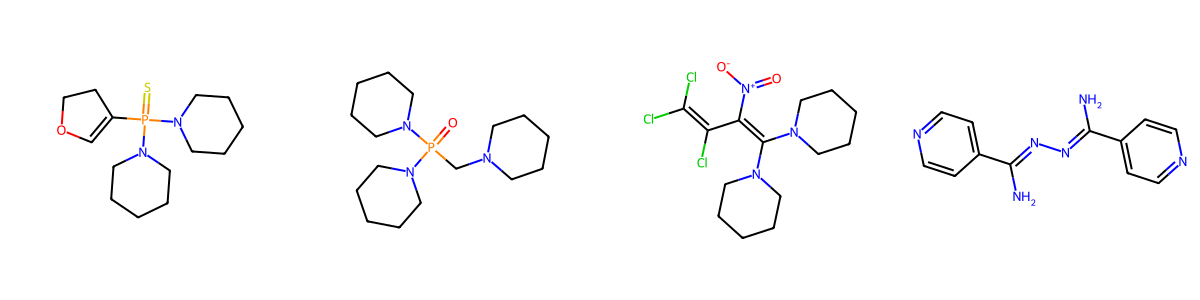

In [24]:
mols = [Chem.MolFromSmiles(x) for x in never_found]
Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(300,300))

# ORGANIZE ROUTES INTO EASY TO SEE FORMAT

In [3]:
# What filters should I use here?
# single step
os.chdir("/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data")
df1 = pd.read_csv("D68EV3CPROA_enumeration_oct10_first_route_1_step.csv")
routes = {}
for i, row in df1.iterrows():
    product = row['smiles']
    reactants = ast.literal_eval(row['reactants'])[0]
    name = ast.literal_eval(row['rxn_order_first_to_last'])[0]
    if product not in routes:
        routes[product] = (name, reactants)
    else:
        routes[product].append((name, reactants))
routes

{'Cc1cc2c(cc1NC(=O)NCCc1nnc3ccccn13)OCO2': ('Formation of urea from two amines',
  ('NCCc1nnc2ccccn12', 'Cc1cc2c(cc1N)OCO2')),
 'Cc1ccc(CCS(=O)(=O)NCc2nnc3ccccn23)cc1': ('Sulfonamide Schotten-Baumann with amine (intermolecular)',
  ('NCc1nnc2ccccn12', 'Cc1ccc(CCS(=O)(=O)Cl)cc1')),
 'OC[C@H](c1ccc2c(c1)OCO2)N(CCc1nnc2ccccn12)C[C@@H](O)c1ccc2c(c1)OCO2': ('Epoxide + amine coupling',
  ('c1cc2c(cc1C1CO1)OCO2', 'OC(CNCCc1nnc2ccccn12)c1ccc2c(c1)OCO2')),
 'O=C(CSc1nnc2ccccn12)Nc1ccc2c(c1)OCO2': ('Amidation',
  ('O=C(O)CSc1nnc2ccccn12', 'Nc1ccc2c(c1)OCO2')),
 'O=C(NCc1nnc2ccccn12)c1ccc2c(c1)OCO2': ('Amidation',
  ('O=C(O)c1ccc2c(c1)OCO2', 'NCc1nnc2ccccn12')),
 'O=S(=O)(CCC1CC1)NCc1nnc2ccccn12': ('Sulfonamide Schotten-Baumann with amine (intermolecular)',
  ('O=S(=O)(Cl)CCC1CC1', 'NCc1nnc2ccccn12')),
 'OC[C@@H](c1ccc2c(c1)OCO2)N(CCc1nnc2ccccn12)C[C@H](O)c1ccc2c(c1)OCO2': ('Epoxide + amine coupling',
  ('c1cc2c(cc1C1CO1)OCO2', 'OC(CNCCc1nnc2ccccn12)c1ccc2c(c1)OCO2')),
 'C[C@@H](c1ccc(F)cc1)S(=O)

In [ ]:
# Save images of routes
# Visualizing output compound and reactants
# Function to save an image to a single PDF
from IPython.display import Image, display

routes_dir = "/Users/kate_fieseler/PycharmProjects/retrievesynthesizable/D68EV3CPROA/routes_data"
# Modified function to visualize compounds and append to a list of images
def visualize_compounds_and_reactants(routes):
    i = 0
    images = []  # List to hold all the images

    for product, (name, reactants) in routes.items():
        i += 1
        # If reactants are not already in a list, wrap them in a list
        if isinstance(reactants, tuple):
            reactants = [reactants]

        for reactant_pair in reactants:
            # Display the compound and its reactants
            smiles_list = [reactants[0][0], reactants[0][1], product]
            caption_list = [name, '', '']
            img = molPlot.draw_molecule_grid(smiles_list, caption_list, title=f'INDEX: {str(i)}')
            display(img)
            print(type(img))
            img_path = f'{routes_dir}/route_{i}.png'
            #img.save(img_path)
            with open(f'{routes_dir}/route_{i}.png', 'wb') as f:
                f.write(img.data)
            images.append(img_path)
        if i == 5:
            break
    # with open(f'{routes_dir}/single_step_routes.pdf', "wb") as f:
    #     f.write(img2pdf.convert(images))
    return images
    # # Save all images to a single PDF
    # images[0].save('50_compounds.pdf', save_all=True, append_images=images[1:])

images = visualize_compounds_and_reactants(routes)

In [19]:
images

In [23]:
from PIL import Image
from io import BytesIO
from IPython.display import Image, display
import IPython

def ipython_image_to_pdf(ipython_img, filename):
    # Convert the IPython Image object to a PIL Image object
    pil_img = Image.open(BytesIO(ipython_img.data))
    
    # Save the PIL Image object to a PDF
    pil_img.save(filename, "PDF")

# Example usage 
images[0].save('output.pdf')
ipython_image_to_pdf(images[0], 'output.pdf')

{'Cc1cc2c(cc1NC(=O)NCCc1nnc3ccccn13)OCO2': ('Formation of urea from two amines',
  ('NCCc1nnc2ccccn12', 'Cc1cc2c(cc1N)OCO2')),
 'Cc1ccc(CCS(=O)(=O)NCc2nnc3ccccn23)cc1': ('Sulfonamide Schotten-Baumann with amine (intermolecular)',
  ('NCc1nnc2ccccn12', 'Cc1ccc(CCS(=O)(=O)Cl)cc1')),
 'OC[C@H](c1ccc2c(c1)OCO2)N(CCc1nnc2ccccn12)C[C@@H](O)c1ccc2c(c1)OCO2': ('Epoxide + amine coupling',
  ('c1cc2c(cc1C1CO1)OCO2', 'OC(CNCCc1nnc2ccccn12)c1ccc2c(c1)OCO2')),
 'O=C(CSc1nnc2ccccn12)Nc1ccc2c(c1)OCO2': ('Amidation',
  ('O=C(O)CSc1nnc2ccccn12', 'Nc1ccc2c(c1)OCO2')),
 'O=C(NCc1nnc2ccccn12)c1ccc2c(c1)OCO2': ('Amidation',
  ('O=C(O)c1ccc2c(c1)OCO2', 'NCc1nnc2ccccn12')),
 'O=S(=O)(CCC1CC1)NCc1nnc2ccccn12': ('Sulfonamide Schotten-Baumann with amine (intermolecular)',
  ('O=S(=O)(Cl)CCC1CC1', 'NCc1nnc2ccccn12')),
 'OC[C@@H](c1ccc2c(c1)OCO2)N(CCc1nnc2ccccn12)C[C@H](O)c1ccc2c(c1)OCO2': ('Epoxide + amine coupling',
  ('c1cc2c(cc1C1CO1)OCO2', 'OC(CNCCc1nnc2ccccn12)c1ccc2c(c1)OCO2')),
 'C[C@@H](c1ccc(F)cc1)S(=O)